<a href="https://colab.research.google.com/github/swaroopkasaraneni/DatasciencePython/blob/main/UnsupervisorCase1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Increase in profits,up to 15-20% as drivers with poor history will be charged more

```
Fields in Data
•id: Unique Id of the driver
•mean_dist_day: Mean distance driven by driver per day
•mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over the speed limit
```



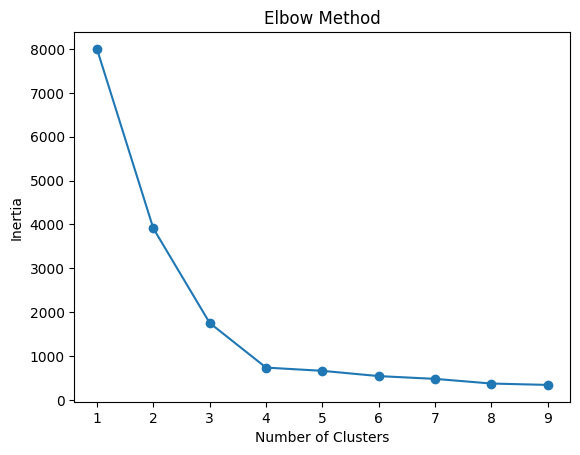

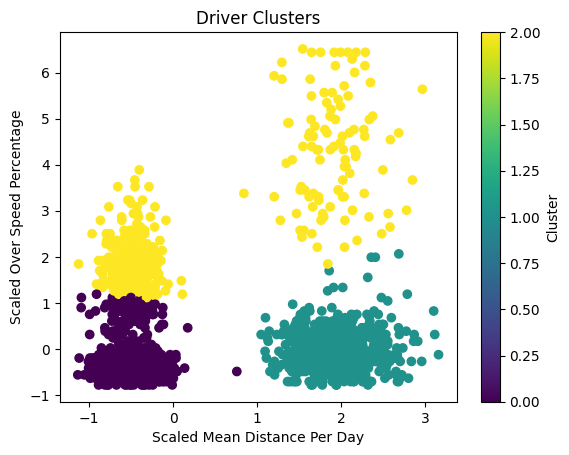

In [5]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

df = pd.read_csv("/content/driver-data.csv")

X = df[['mean_dist_day', 'mean_over_speed_perc']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
for cluster in range(optimal_clusters):
    cluster_data = df[df['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data.describe())

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['cluster'], cmap='viridis')
plt.title("Driver Clusters")
plt.xlabel("Scaled Mean Distance Per Day")
plt.ylabel("Scaled Over Speed Percentage")
plt.colorbar(label='Cluster')
plt.show()
